# aWhere API Python Solution Demo

## Environment Setup

In [1]:
# Imports
import os
import matplotlib.pyplot as plt
import earthpy as et
from awhere_classes import *
import awhere_grid as ag

# Show all pandas columns and rows
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [2]:
# Define aWhere API key and secret
api_key = os.environ.get('AWHERE_API_KEY')
api_secret = os.environ.get('AWHERE_API_SECRET')

In [3]:
# Set working directory
working_directory = os.path.join(
    et.io.HOME, 'earth-analytics', 
    '03-geog5663-earth-analytics-applications-summer-2020',
    'git-repos', 'fire-drought-analysis')

## Create aWhere Grid

In [4]:
# Define path to Bernardo fire extent boundary
rmnp_bound_path = os.path.join(
    working_directory, '02-raw-data', 'co-rmnp', 'rmnp_boundary.shp')

In [5]:
# Project fire bounary to 4236 (for plotting)
rmnp_bound_4326 = gpd.read_file(rmnp_bound_path).to_crs(4326)

C:\.conda\envs\earth-analytics-python\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [6]:
# Create aWhere grid for Bernardo extent
rmnp_grid = ag.create_awhere_grid(rmnp_bound_path, buffer_distance=.12)

C:\.conda\envs\earth-analytics-python\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


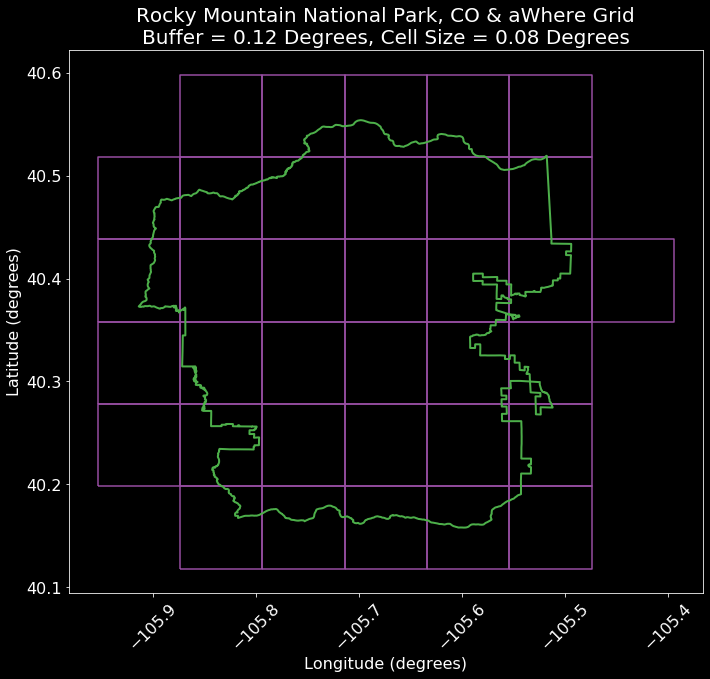

In [7]:
# Plot boundary (4326) and grid
with plt.style.context('dark_background'):

    fig, ax = plt.subplots(figsize=(20, 10))
    rmnp_grid.plot(ax=ax, facecolor="none",
                       edgecolor="#984ea3", linewidth=1.5, 
                       label='aWhere Grid', legend=True)
    rmnp_bound_4326.plot(ax=ax, facecolor="none",
                             edgecolor="#4daf4a", linewidth=2,
                             label='Bernardo Fire Extent', legend=True)

    ax.set_xlabel("Longitude (degrees)", fontsize=16)
    ax.set_ylabel("Latitude (degrees)", fontsize=16)
    ax.set_title(
        "Rocky Mountain National Park, CO & aWhere Grid\nBuffer = 0.12 Degrees, Cell Size = 0.08 Degrees",
        fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=16)
    plt.xticks(rotation=45)
 
    plt.show()

## Extract Grid Centroids

In [8]:
# Extract grid centroids to list
rmnp_grid_centroids = ag.extract_centroids(rmnp_grid)

In [9]:
# Display first centroid
rmnp_grid_centroids[0]

(-105.91371876783066, 40.23807909092806)

In [10]:
# Display all centroids
rmnp_grid_centroids

[(-105.91371876783066, 40.23807909092806),
 (-105.91371876783066, 40.31807909092806),
 (-105.91371876783066, 40.398079090928064),
 (-105.91371876783066, 40.47807909092805),
 (-105.83371876783065, 40.15807909092806),
 (-105.83371876783065, 40.23807909092806),
 (-105.83371876783065, 40.31807909092806),
 (-105.83371876783065, 40.398079090928064),
 (-105.83371876783065, 40.47807909092805),
 (-105.83371876783065, 40.558079090928054),
 (-105.75371876783065, 40.15807909092806),
 (-105.75371876783065, 40.23807909092806),
 (-105.75371876783065, 40.31807909092806),
 (-105.75371876783065, 40.398079090928064),
 (-105.75371876783065, 40.47807909092805),
 (-105.75371876783065, 40.558079090928054),
 (-105.67371876783066, 40.15807909092806),
 (-105.67371876783066, 40.23807909092806),
 (-105.67371876783066, 40.31807909092806),
 (-105.67371876783066, 40.398079090928064),
 (-105.67371876783066, 40.47807909092805),
 (-105.67371876783066, 40.558079090928054),
 (-105.59371876783067, 40.15807909092806),
 (-1

## Get aWhere API Data

In [11]:
# Define kwargs (parameters from get_data)
values_kwargs ={'start_day': '2014-05-04' , 'end_day': '2014-05-13'}
norms_kwargs ={'start_day': '05-04' , 'end_day': '05-13'}

### Weather Norms, 05-04 to 05-13

In [12]:
# Define WeatherLocationNorms object
weather_norms_object = WeatherLocationNorms(
    api_key, api_secret, latitude=rmnp_grid_centroids[0][1], 
    longitude=rmnp_grid_centroids[0][0])

In [13]:
# Create geodataframe
weather_norms_gdf = WeatherLocationNorms.api_to_gdf(
    weather_norms_object, kwargs=norms_kwargs)

In [14]:
# Display geodataframe
weather_norms_gdf

,mean_temp_avg_cels,mean_temp_std_dev_cels,max_temp_avg_cels,max_temp_std_dev_cels,min_temp_avg_cels,min_temp_std_dev_cels,precip_avg_mm,precip_std_dev_mm,solar_avg_w_h_per_m2,solar_avg_std_dev_w_h_per_m2,min_humiduty_avg_%,min_humidity_std_dev_%,max_humiduty_avg_%,max_humidity_std_dev_%,daily_max_wind_avg_m_per_sec,daily_max_wind_std_dev_m_per_sec,average_wind_m_per_sec,average_wind_std_dev_m_per_sec,geometry
day,,,,,,,,,,,,,,,,,,,
05-04,7.5330,3.072114,14.922,4.794972,0.144,2.377619,0.125800,0.397815,6173.843921,1595.734861,23.269000,14.108169,73.658000,16.066586,8.298780,3.220234,3.747758,1.842511,POINT (-105.91372 40.23808)
05-05,8.1805,2.779992,16.365,3.960890,-0.004,2.475113,0.154352,0.398029,6562.428027,1414.852615,20.857000,14.692513,76.624999,12.906793,7.790115,2.065141,3.445053,1.090904,POINT (-105.91372 40.23808)
05-06,8.2615,2.983118,15.425,4.417370,1.098,2.124188,0.771379,1.546673,5727.726855,1293.423446,26.225000,15.440442,78.180000,17.063363,8.402904,1.503993,3.525577,0.965821,POINT (-105.91372 40.23808)
05-07,6.8775,3.841544,13.036,5.147270,0.719,2.957196,3.074469,3.521206,5256.325562,1394.645794,35.589999,19.447952,84.893000,12.035918,8.392796,1.387271,3.421678,0.787657,POINT (-105.91372 40.23808)
05-08,5.7170,3.595947,11.976,5.443014,-0.542,2.490305,0.669800,1.125850,5173.111353,1999.583560,38.840001,21.116084,88.642999,14.360916,7.672868,1.294650,3.293784,0.778038,POINT (-105.91372 40.23808)
05-09,6.5645,4.472970,13.449,6.757038,-0.320,2.832541,3.127800,5.288446,5219.131421,1688.535257,35.984000,20.130863,87.616001,12.978156,8.491211,2.475957,3.394041,1.115855,POINT (-105.91372 40.23808)
05-10,6.0450,4.102232,12.122,6.200553,-0.032,2.635117,1.445050,2.478485,5014.628198,1569.683150,35.595000,20.581192,89.287999,12.242263,8.225091,1.678993,3.583880,1.006810,POINT (-105.91372 40.23808)
05-11,4.6300,3.773490,10.648,5.372100,-1.388,2.647476,2.379500,5.241635,4719.704419,1697.492050,41.296000,21.945795,94.477000,4.008329,7.506630,1.067336,3.415612,0.844104,POINT (-105.91372 40.23808)
05-12,5.4780,4.758887,12.213,7.044150,-1.257,3.060665,1.073600,2.463435,5337.571362,1968.730129,35.405000,18.201745,89.844999,6.264105,6.879089,1.155288,3.117840,0.705540,POINT (-105.91372 40.23808)


In [15]:
# Get precip avg
rmnp_precip_norms = weather_norms_gdf[['precip_avg_mm']]

### Weather Observed, 2014-05-04 to 2014-05-13

In [16]:
# Define WeatherLocationObserved object
weather_observed_object = WeatherLocationObserved(
    api_key, api_secret, latitude=rmnp_grid_centroids[0][1], 
    longitude=rmnp_grid_centroids[0][0])

In [17]:
# Create geodataframe
weather_observed_gdf = WeatherLocationObserved.api_to_gdf(
    weather_observed_object, kwargs=values_kwargs)

In [18]:
# Display geodataframe
weather_observed_gdf

,temp_max_cels,temp_min_cels,precip_amount_mm,solar_energy_w_h_per_m2,rel_humidity_max_%,rel_humidity_min_%,wind_morning_max_m_per_sec,wind_day_max_m_per_sec,wind_avg_m_per_sec,geometry
date,,,,,,,,,,
2014-05-04,20.280001,4.32,1.2580,7388.182617,47.369999,8.580000,11.433436,12.690346,6.269575,POINT (-105.91372 40.23808)
2014-05-05,18.030001,1.96,1.2580,7386.245605,54.430000,8.510000,7.308416,8.595894,4.185597,POINT (-105.91372 40.23808)
2014-05-06,17.070000,1.68,4.3065,6866.908691,61.680000,13.120000,6.511608,8.717894,3.744873,POINT (-105.91372 40.23808)
2014-05-07,12.900000,-0.44,2.1530,5217.457520,79.730003,25.059999,8.000993,9.787355,4.377469,POINT (-105.91372 40.23808)
2014-05-08,6.230000,-1.91,2.1530,3384.469238,99.279999,53.009998,5.630669,7.863203,4.005401,POINT (-105.91372 40.23808)
2014-05-09,10.500000,-2.10,0.0000,4775.274414,96.720001,46.580002,7.506359,11.326076,4.811516,POINT (-105.91372 40.23808)
2014-05-10,9.330000,-0.65,0.0000,4214.401367,98.019997,49.189999,6.696489,8.503947,4.304587,POINT (-105.91372 40.23808)
2014-05-11,2.850000,-4.13,8.3240,2443.861084,100.000000,77.669998,7.579279,9.010052,4.556049,POINT (-105.91372 40.23808)
2014-05-12,0.840000,-5.37,0.0000,3452.642090,95.269997,51.169998,6.996462,7.617424,4.388861,POINT (-105.91372 40.23808)


In [19]:
# Get precip amount
rmnp_precip_observed = weather_observed_gdf[['precip_amount_mm']]

# Change date (YYYY-MM-DD) to day (MM-DD) for plotting
days = [value[5:] for value in rmnp_precip_observed.index.values]
rmnp_precip_observed.insert(1, "day", days, True)
rmnp_precip_observed.set_index('day', inplace=True)

### Agronomic Norms - 05-04 to 05-13

In [20]:
# Define AgronomicLocationNorms object
agronomic_object = AgronomicsLocationNorms(
    api_key, api_secret, latitude=rmnp_grid_centroids[0][1], 
    longitude=rmnp_grid_centroids[0][0])

In [21]:
# Create geodataframe - date range
ag_norms_total_accum_gdf, ag_norms_daily_accum_gdf = AgronomicsLocationNorms.api_to_gdf(
    agronomic_object, value_type='multi_day', kwargs=norms_kwargs)

In [22]:
# Display geodataframe - total
ag_norms_total_accum_gdf

,gdd_range_average_total_cels,gdd_range_average_total_std_dev_cels,precip_range_average_total_mm,precip_range_average_total_std_dev_mm,pet_range_average_total_mm,pet_range_average_total_std_dev,ppet_range_daily_average,ppet_range_daily_average_std_dev,start_day,end_day,geometry
date_range,,,,,,,,,,,
05-04/05-13,4.085,3.724949,14.26415,5.814561,35.139082,6.313705,0.719814,0.457642,05-04,05-13,POINT (-105.91372 40.23808)


In [23]:
# Display dataframe - daily
ag_norms_daily_accum_gdf

,gdd_daily_average_cels,gdd_daily_average_std_dev_cels,pet_daily_average_mm,pet_daily_average_std_dev_mm,ppet_daliy_average,ppet_daily_average_std_dev,gdd_rolling_total_average,gdd_rolling_total_average_std_dev,precip_rolling_total_average_mm,precip_rolling_total_average_std_dev_mm,pet_rolling_total_average_mm,pet_rolling_total_average_std_dev_mm,ppet_rolling_total_average,ppet_rolling_total_average_std_dev,geometry
day,,,,,,,,,,,,,,,
05-04,0.5320,1.134321,4.157771,1.445996,0.019047,0.060233,0.5320,1.134321,0.125800,0.397815,4.157771,1.445996,0.019047,0.060233,POINT (-105.91372 40.23808)
05-05,0.3880,0.639966,4.335471,1.104296,0.030059,0.074147,0.9200,1.521405,0.280152,0.790705,8.493242,2.453317,0.049106,0.132935,POINT (-105.91372 40.23808)
05-06,0.4620,0.940591,3.919487,1.109033,0.166118,0.323895,1.3820,1.829590,1.051531,2.230184,12.412728,3.112626,0.215224,0.435388,POINT (-105.91372 40.23808)
05-07,0.4900,0.844456,3.334133,1.261635,1.225682,1.652719,1.8720,2.090592,4.126000,4.401782,15.746861,3.436866,1.440905,1.796000,POINT (-105.91372 40.23808)
05-08,0.2400,0.505970,3.141415,1.482968,0.291558,0.517764,2.1120,2.144006,4.795800,5.366871,18.888276,4.188790,1.732464,2.193660,POINT (-105.91372 40.23808)
05-09,0.3860,0.968750,3.378663,1.494726,1.509476,2.731790,2.4980,2.424412,7.923600,7.155665,22.266939,5.312945,3.241939,3.102454,POINT (-105.91372 40.23808)
05-10,0.4830,1.027078,3.191760,1.375819,0.728984,1.510522,2.9810,3.042637,9.368650,7.820863,25.458699,6.256225,3.970923,4.089059,POINT (-105.91372 40.23808)
05-11,0.1475,0.466436,2.772233,1.135621,2.245943,4.997603,3.1285,3.304847,11.748150,7.731033,28.230932,6.110820,6.216866,5.211214,POINT (-105.91372 40.23808)
05-12,0.2470,0.455175,3.258234,1.429350,0.337824,0.721232,3.3755,3.392997,12.821750,6.477710,31.489165,5.933555,6.554689,4.888867,POINT (-105.91372 40.23808)


In [24]:
# Get rolling total average
rmnp_agro_norms = ag_norms_daily_accum_gdf[['precip_rolling_total_average_mm']]

### Agronomic Values - 2014-05-04 to 2014-05-13

In [25]:
# Define AgronomicLocationValues object
agronomic_values_object = AgronomicsLocationValues(
    api_key, api_secret, latitude=rmnp_grid_centroids[0][1], 
    longitude=rmnp_grid_centroids[0][0])

In [26]:
# Create geodataframe - date range
ag_vals_total_accum_gdf, ag_vals_daily_accum_gdf = AgronomicsLocationValues.api_to_gdf(
    agronomic_values_object, value_type='multi_day', kwargs=values_kwargs)

In [27]:
# Display geodataframe - total
ag_vals_total_accum_gdf

,gdd_range_total_cels,ppet_range_total,precip_range_total_mm,pet_range_total_mm,start_day,end_day,geometry
date_range,,,,,,,
2014-05-04/2014-05-13,2.3,10.787635,19.452501,32.485142,2014-05-04,2014-05-13,POINT (-105.91372 40.23808)


In [28]:
# Display dataframe - daily
ag_vals_daily_accum_gdf

,gdd_daily_total_cels,ppet_daily_total,gdd_rolling_total_cels,ppet_rolling_total,pet_daily_total_mm,precip_rolling_total_mm,pet_rolling_total_mm,geometry
date,,,,,,,,
2014-05-04,2.3,0.190473,2.3,0.190473,6.604603,1.258000,6.604603,POINT (-105.91372 40.23808)
2014-05-05,0.0,0.231958,2.3,0.422432,5.423386,2.516000,12.027989,POINT (-105.91372 40.23808)
2014-05-06,0.0,0.885854,2.3,1.308286,4.861410,6.822500,16.889400,POINT (-105.91372 40.23808)
2014-05-07,0.0,0.595278,2.3,1.903564,3.616797,8.975500,20.506196,POINT (-105.91372 40.23808)
2014-05-08,0.0,1.164659,2.3,3.068223,1.848610,11.128500,22.354807,POINT (-105.91372 40.23808)
2014-05-09,0.0,0.000000,2.3,3.068223,2.676341,11.128500,25.031147,POINT (-105.91372 40.23808)
2014-05-10,0.0,0.000000,2.3,3.068223,2.381153,11.128500,27.412300,POINT (-105.91372 40.23808)
2014-05-11,0.0,7.719412,2.3,10.787635,1.078320,19.452501,28.490620,POINT (-105.91372 40.23808)
2014-05-12,0.0,0.000000,2.3,10.787635,1.545299,19.452501,30.035920,POINT (-105.91372 40.23808)


In [29]:
# Get rolling total
rmnp_agro_observed = ag_vals_daily_accum_gdf[['precip_rolling_total_mm']]

# Change date (YYYY-MM-DD) to day (MM-DD) for plotting
days = [value[5:] for value in rmnp_agro_observed.index.values]
rmnp_agro_observed.insert(1, "day", days, True)
rmnp_agro_observed.set_index('day', inplace=True)

### Combine Data for Plotting

In [30]:
# Merge precip and agro indivdual components (norms and observed for both)
rmnp_precip_may_2014 = rmnp_precip_observed.merge(rmnp_precip_norms, on='day')
rmnp_agro_may_2014 = rmnp_agro_observed.merge(rmnp_agro_norms, on='day')

# Merge precip and agro together
rmnp_may_2014 = rmnp_precip_may_2014.merge(rmnp_agro_may_2014, on='day')

In [31]:
# Add columns for differences between observed and norms
rmnp_may_2014['precip_daily_total_diff_mm'] = rmnp_may_2014.precip_amount_mm - \
     rmnp_may_2014.precip_avg_mm

rmnp_may_2014['precip_rolling_total_diff_mm'] = rmnp_may_2014.precip_rolling_total_mm - \
    rmnp_may_2014.precip_rolling_total_average_mm

In [32]:
# Display dataframe
rmnp_may_2014

,precip_amount_mm,precip_avg_mm,precip_rolling_total_mm,precip_rolling_total_average_mm,precip_daily_total_diff_mm,precip_rolling_total_diff_mm
day,,,,,,
05-04,1.2580,0.125800,1.258000,0.125800,1.132200,1.132200
05-05,1.2580,0.154352,2.516000,0.280152,1.103648,2.235848
05-06,4.3065,0.771379,6.822500,1.051531,3.535121,5.770969
05-07,2.1530,3.074469,8.975500,4.126000,-0.921469,4.849500
05-08,2.1530,0.669800,11.128500,4.795800,1.483200,6.332700
05-09,0.0000,3.127800,11.128500,7.923600,-3.127800,3.204900
05-10,0.0000,1.445050,11.128500,9.368650,-1.445050,1.759850
05-11,8.3240,2.379500,19.452501,11.748150,5.944500,7.704351
05-12,0.0000,1.073600,19.452501,12.821750,-1.073600,6.630751


## Visualize Precipitation Data

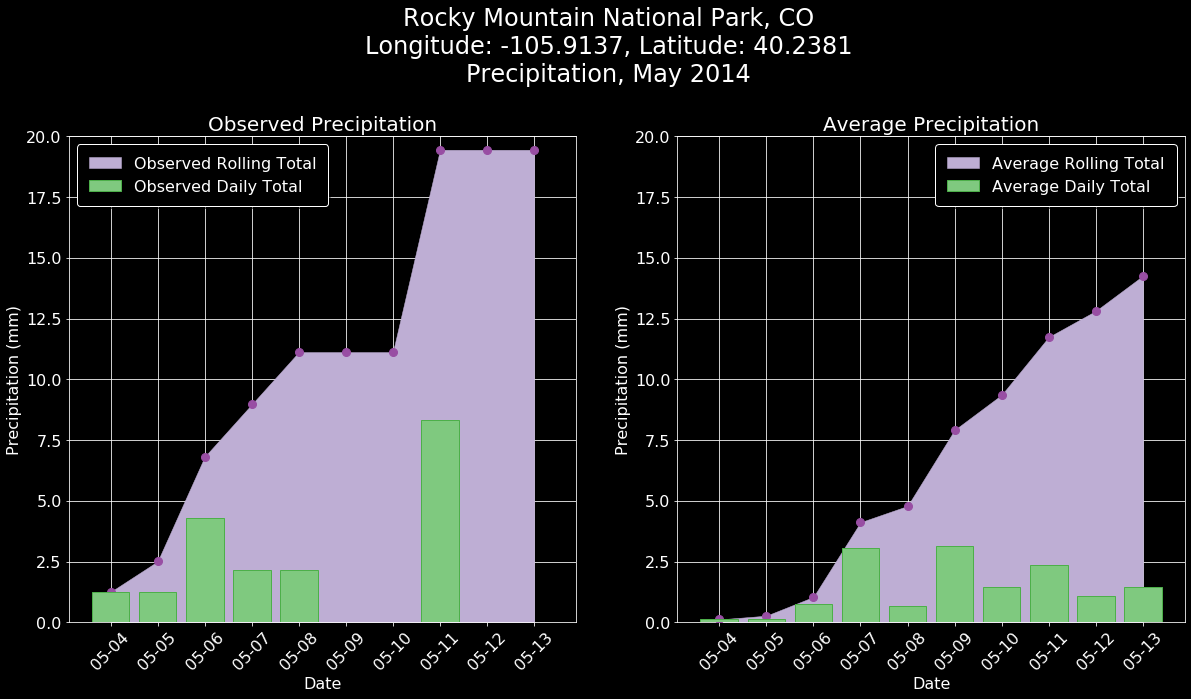

In [33]:
# Plot accumulation (observed and norms)
with plt.style.context('dark_background'):

    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    # Set overall title
    plt.suptitle(
        f'Rocky Mountain National Park, CO\nLongitude: {round(rmnp_grid_centroids[0][0], 4)}, Latitude: {round(rmnp_grid_centroids[0][1], 4)}\nPrecipitation, May 2014',
        fontsize=24)

    plt.subplots_adjust(top=0.8)

    # Subplot 1 - Observed Precipitation
    # Creat grid
    ax[0].grid(zorder=1)

    # Add daily total (bar)
    ax[0].bar(
        rmnp_may_2014.index.values, rmnp_may_2014.precip_amount_mm,
        label='Observed Daily Total', color='#7fc97f',
        linewidth=1, zorder=4, edgecolor='#4daf4a', alpha=1)

    # Add rolling total (line)
    ax[0].plot(
        rmnp_may_2014.precip_rolling_total_mm, marker='o',
        color='#984ea3', markersize=8, linewidth=0,
        linestyle='--', zorder=3)

    # Add rolling total (fill)
    ax[0].fill_between(
        rmnp_may_2014.index.values, rmnp_may_2014.precip_rolling_total_mm,
        label='Observed Rolling Total', color='#beaed4',
        linewidth=0.5, linestyle='-', zorder=2, alpha=1)

    # Configure axes
    ax[0].set_xlabel("Date", fontsize=16)
    ax[0].set_ylabel("Precipitation (mm)", fontsize=16)
    ax[0].set_title("Observed Precipitation", fontsize=20)
    ax[0].tick_params(axis='both', which='major', labelsize=16)
    ax[0].set_ylim(0, 20)
    plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)

    # Add legend
    ax[0].legend(borderpad=0.75, edgecolor='w', fontsize=16, shadow=True)

    # Subplot 2 - Average Precipitation
    # Create grid
    ax[1].grid(zorder=1)

    # Add average daily total (bar)
    ax[1].bar(
        rmnp_may_2014.index.values, rmnp_may_2014.precip_avg_mm,
        label='Average Daily Total', color='#7fc97f',
        linewidth=1, zorder=4, edgecolor='#4daf4a')

    # Add rolling total average (line)
    ax[1].plot(
        rmnp_may_2014.precip_rolling_total_average_mm,
        marker='o', color='#984ea3', markersize=8,
        linewidth=0, linestyle='--', zorder=3)

    # Add rolling total average (fill)
    ax[1].fill_between(
        rmnp_may_2014.index.values, rmnp_may_2014.precip_rolling_total_average_mm,
        label='Average Rolling Total', color='#beaed4',
        linewidth=0.5, linestyle='-', zorder=2, alpha=1)

    # Configure axes
    ax[1].set_xlabel("Date", fontsize=16)
    ax[1].set_ylabel("Precipitation (mm)", fontsize=16)
    ax[1].set_title("Average Precipitation", fontsize=20)
    ax[1].tick_params(axis='both', which='major', labelsize=16)
    ax[1].set_ylim(0, 20)
    plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)

    # Add legend
    ax[1].legend(borderpad=0.75, edgecolor='w', fontsize=16, shadow=True)

    plt.show()

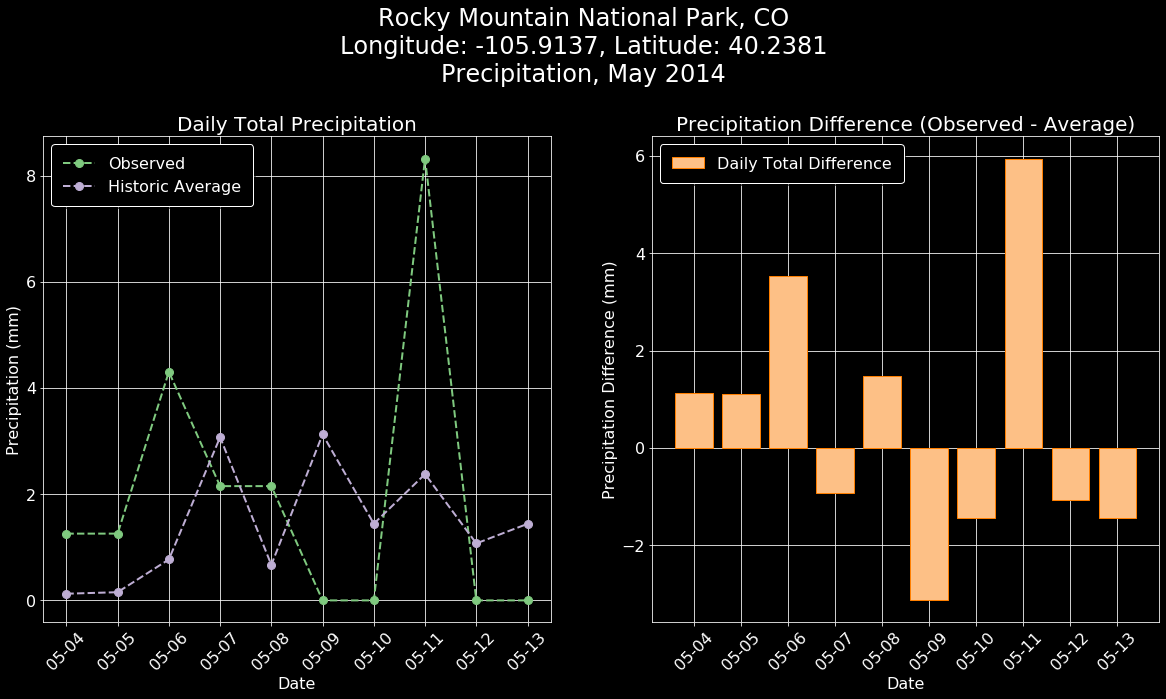

In [34]:
# Plot daily total comparison
with plt.style.context('dark_background'):

    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    # Set overall title
    plt.suptitle(
        f'Rocky Mountain National Park, CO\nLongitude: {round(rmnp_grid_centroids[0][0], 4)}, Latitude: {round(rmnp_grid_centroids[0][1], 4)}\nPrecipitation, May 2014',
        fontsize=24)

    plt.subplots_adjust(top=0.8)

    # Subplot 1 - Observed Precipitation
    # Creat grid
    ax[0].grid(zorder=1)

    # Add daily observed total (line)
    ax[0].plot(
        rmnp_may_2014.precip_amount_mm, label='Observed',
        marker='o', color='#7fc97f', markersize=8,
        linewidth=2, linestyle='--', zorder=2)

    # Add daily average total (line)
    ax[0].plot(
        rmnp_may_2014.precip_avg_mm, label='Historic Average',
        marker='o', color='#beaed4', markersize=8,
        linewidth=2, linestyle='--', zorder=3)

    # Configure axes
    ax[0].set_xlabel("Date", fontsize=16)
    ax[0].set_ylabel("Precipitation (mm)", fontsize=16)
    ax[0].set_title("Daily Total Precipitation", fontsize=20)
    ax[0].tick_params(axis='both', which='major', labelsize=16)
    plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)

    # Add legend
    ax[0].legend(borderpad=0.75, edgecolor='w', fontsize=16, shadow=True)

    # Subplot 2 - Precipitation Difference
    # Creat grid
    ax[1].grid(zorder=1)

    # Add difference (observed - norms)
    ax[1].bar(
        rmnp_may_2014.index.values, rmnp_may_2014.precip_daily_total_diff_mm,
        label='Daily Total Difference', zorder=2, edgecolor='#ff7f00',
        color='#fdc086', linewidth=1)

    # Configure axes
    ax[1].set_xlabel("Date", fontsize=16)
    ax[1].set_ylabel("Precipitation Difference (mm)", fontsize=16)
    ax[1].set_title(
        "Precipitation Difference (Observed - Average)", fontsize=20)
    ax[1].tick_params(axis='both', which='major', labelsize=16)
    plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45) 

    # Add legend
    ax[1].legend(borderpad=0.75, edgecolor='w', fontsize=16, shadow=True)

    plt.show()

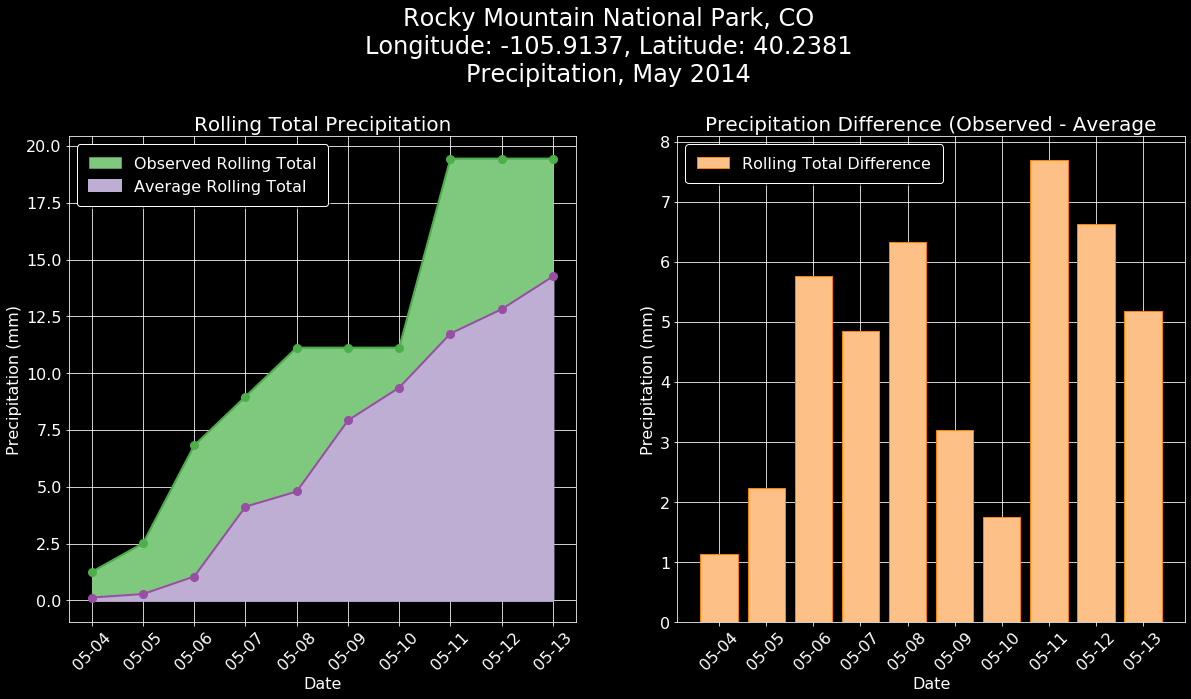

In [35]:
# Plot rolling total comparison
with plt.style.context('dark_background'):

    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    # Set overall title
    plt.suptitle(
        f'Rocky Mountain National Park, CO\nLongitude: {round(rmnp_grid_centroids[0][0], 4)}, Latitude: {round(rmnp_grid_centroids[0][1], 4)}\nPrecipitation, May 2014',
        fontsize=24)

    plt.subplots_adjust(top=0.8)

    # Subplot 1 - Observed Precipitation
    # Creat grid
    ax[0].grid(zorder=1)

    # Add observed rolling total (line)
    ax[0].plot(
        rmnp_may_2014.precip_rolling_total_mm,
        marker='o', color='#4daf4a', markersize=8,
        linewidth=2, linestyle='-', zorder=2)

    # Add observed rolling total (fill)
    ax[0].fill_between(
        rmnp_may_2014.index.values, rmnp_may_2014.precip_rolling_total_mm,
        label='Observed Rolling Total', color='#7fc97f',
        linewidth=0.5, linestyle='-', zorder=2, alpha=1)

    # Add average rolling total (line)
    ax[0].plot(
        rmnp_may_2014.precip_rolling_total_average_mm,
        marker='o', color='#984ea3', markersize=8,
        linewidth=2, linestyle='-', zorder=3)

    # Add average rolling total (fill)
    ax[0].fill_between(
        rmnp_may_2014.index.values, rmnp_may_2014.precip_rolling_total_average_mm,
        label='Average Rolling Total', color='#beaed4',
        linewidth=2, linestyle='-', zorder=2, alpha=1)

    # Configure axes
    ax[0].set_xlabel("Date", fontsize=16)
    ax[0].set_ylabel("Precipitation (mm)", fontsize=16)
    ax[0].set_title("Rolling Total Precipitation", fontsize=20)
    ax[0].tick_params(axis='both', which='major', labelsize=16)
    plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)

    # Add legend
    ax[0].legend(borderpad=0.75, edgecolor='w', fontsize=16, shadow=True)

    # Subplot 2 - Precipitation Difference
    # Creat grid
    ax[1].grid(zorder=1)

    # Add difference (observed - norms)
    ax[1].bar(
        rmnp_may_2014.index.values, rmnp_may_2014.precip_rolling_total_diff_mm,
        label='Rolling Total Difference', zorder=2,
        color='#fdc086', linewidth=1, edgecolor='#ff7f00')

    # Configure axes
    ax[1].set_xlabel("Date", fontsize=16)
    ax[1].set_ylabel("Precipitation (mm)", fontsize=16)
    ax[1].set_title(
        "Precipitation Difference (Observed - Average", fontsize=20)
    ax[1].tick_params(axis='both', which='major', labelsize=16)
    plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)

    # Add legend
    ax[1].legend(borderpad=0.75, edgecolor='w', fontsize=16, shadow=True)
    
    plt.show()